In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:

  def __init__(self, n_inputs, learning_rate):
    self.w = - 1 + 2 * np.random.rand(n_inputs)
    self.b = - 1 + 2 * np.random.rand()
    self.eta = learning_rate

  def predict(self, X):
    _, p = X.shape
    y_est = np.zeros(p)
    for i in range(p):
      y_est[i] = np.dot(self.w, X[:,i])+self.b
      if y_est[i] >= 0:
        y_est[i]=1
      else:
        y_est[i]=0
    return y_est

  def fit(self, X, Y, epochs=50):
    _, p = X.shape
    for _ in range(epochs):
      for i in range(p):
        y_est = self.predict(X[:,i].reshape(-1,1))
        self.w += self.eta * (Y[i]-y_est) * X[:,i]
        self.b += self.eta * (Y[i]-y_est)

def draw_2d_percep(model):
  w1, w2, b = model.w[0], model.w[1], model.b 
  plt.plot([-2, 2],[(1/w2)*(-w1*(-2)-b),(1/w2)*(-w1*2-b)],'--k')


[[ 63 137  99 121 113 136  68  91 144  50 146  70  57 143 133  81 142 140
  146 121]
 [186 161 143 197 167 204 211 197 148 165 166 162 162 217 160 146 166 146
  165 185]]
[[0.14290129 0.21435194 0.1027103  0.27240559 0.10717597]
 [0.33269207 0.43986804 0.44879938 0.32822641 0.47336054]]
[0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1]


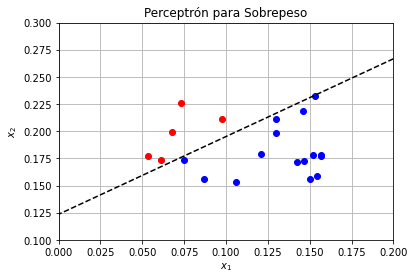

In [ ]:
def isOverweight(kg, cm):
  m = cm/100
  if (kg/m**2) > 25:
    return 1
  return 0

# Instanciar el modelo
model = Perceptron(2, 0.1)

# Datos
people = 20
x_weight = np.random.randint(40,151, people)
x_height = np.random.randint(140, 220, people)
X = np.array([x_weight, x_height])

# Crear array con el resultado del sobrepeso
f = np.frompyfunc(isOverweight,2, 1)
Y = f(x_weight, x_height)

# Normalizar X
X = X / np.linalg.norm(X)

# Entrenar
model.fit(X,Y)

# Predicción
model.predict(X)

# Primero dibujemos los puntos
_, p = X.shape
for i in range(p):
  if Y[i] == 0:
    plt.plot(X[0,i],X[1,i], 'or')
  else:
    plt.plot(X[0,i],X[1,i], 'ob')

plt.title('Perceptrón para Sobrepeso')
plt.grid('on')
plt.xlim([0,0.2])
plt.ylim([0.1,0.3])
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

draw_2d_percep(model)